In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [4]:
df= pd.read_csv("C:\\Users\\dhuma\\Downloads\\Salaries.csv")
print(df)

         rank discipline  phd  service     sex  salary
0        Prof          B   56       49    Male  186960
1        Prof          A   12        6    Male   93000
2        Prof          A   23       20    Male  110515
3        Prof          A   40       31    Male  131205
4        Prof          B   20       18    Male  104800
..        ...        ...  ...      ...     ...     ...
73       Prof          B   18       10  Female  105450
74  AssocProf          B   19        6  Female  104542
75       Prof          B   17       17  Female  124312
76       Prof          A   28       14  Female  109954
77       Prof          A   23       15  Female  109646

[78 rows x 6 columns]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        78 non-null     object
 1   discipline  78 non-null     object
 2   phd         78 non-null     int64 
 3   service     78 non-null     int64 
 4   sex         78 non-null     object
 5   salary      78 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ KB


In [8]:
df = df.drop('discipline', axis=1)

In [9]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [18]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories= [['Male','Female']])
df['sex'] = oe.fit_transform(df[['sex']])

In [24]:
df['rank'].unique()

array(['Prof', 'AssocProf', 'AsstProf'], dtype=object)

In [25]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories= [['Prof','AssocProf','AsstProf',]])
df['rank'] = oe.fit_transform(df[['rank']])

In [26]:
X = df.iloc[:,:4]
y = df.iloc[:,4]
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.6, random_state=0)


In [28]:
from sklearn.ensemble import RandomForestRegressor


In [29]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

In [30]:
regressor.fit(X,y)

C:\Users\dhuma\miniconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
oob_score = regressor.oob_score_
print(oob_score)

0.024143139695924742


In [34]:
prediction = regressor.predict(X)
mse = mean_squared_error(y, prediction)
mse

116016289.44490743

In [35]:
r2 = r2_score(y, prediction)
print(f'R-squared: {r2}')

R-squared: 0.8531937461415446


# visualisation

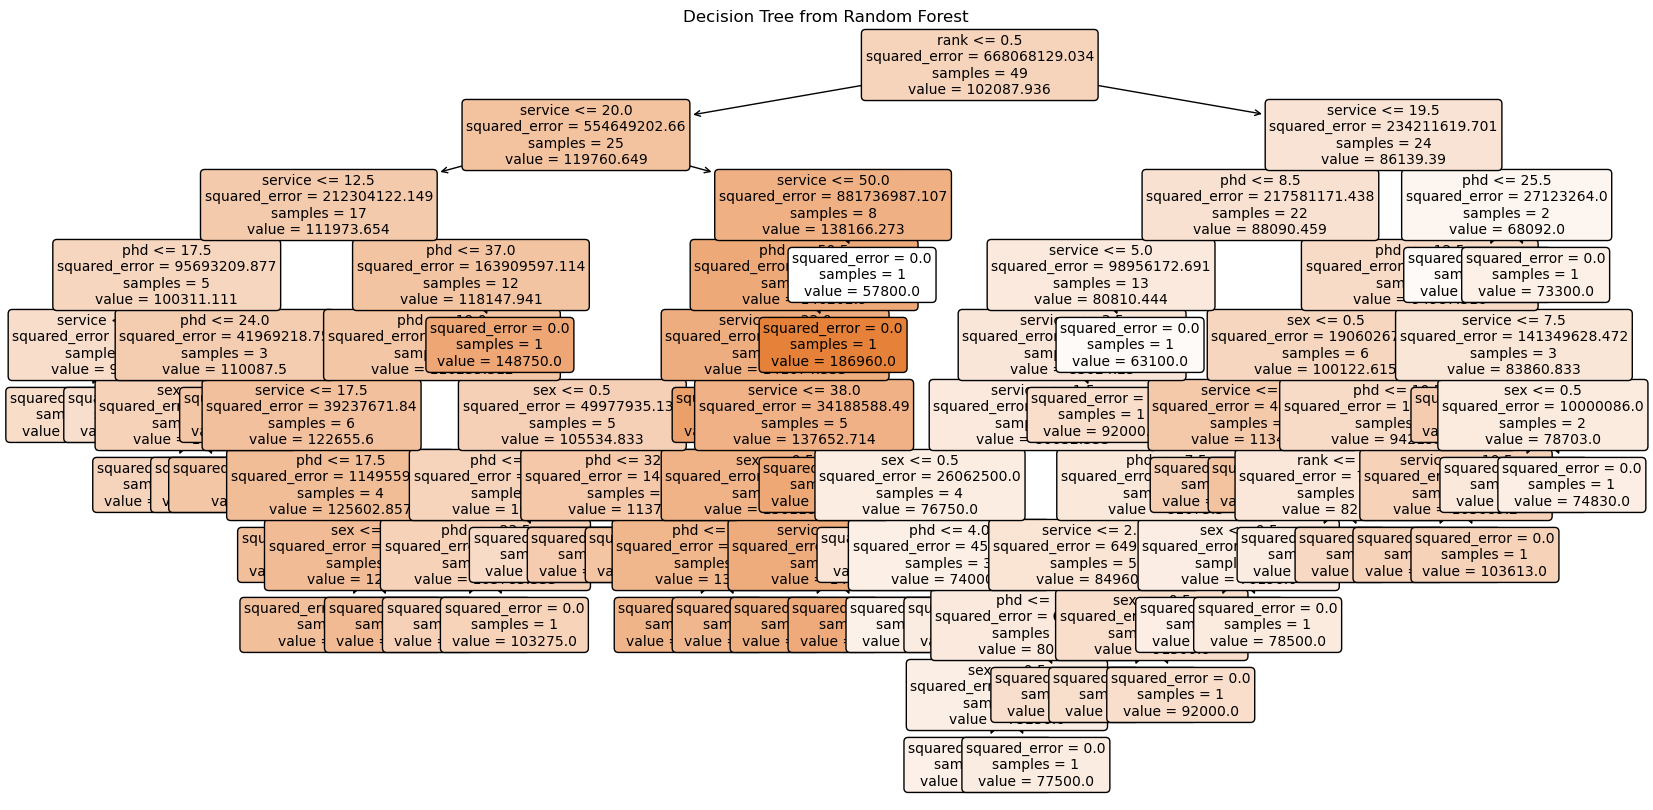

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
 
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]
 
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()